In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df = pd.read_csv('Height-Weight.csv')

In [77]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

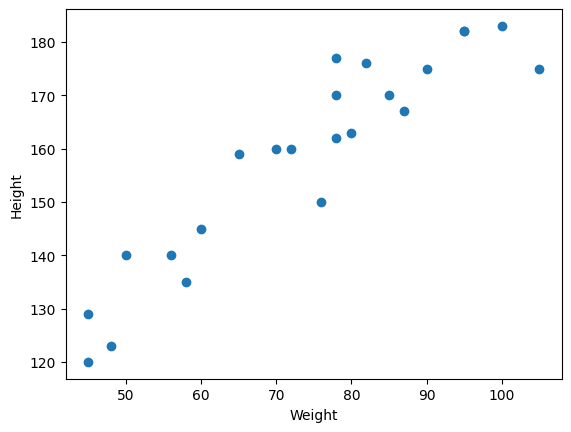

In [78]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [79]:
x = df[['Weight']]  #now it's 2d and won't be a problem in train test split
y = df['Height']

In [80]:
x.head(),y.head()

(   Weight
 0      45
 1      58
 2      48
 3      60
 4      70,
 0    120
 1    135
 2    123
 3    145
 4    160
 Name: Height, dtype: int64)

In [81]:
#Train test split
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [83]:
x_train.shape, x_test.shape

((18, 1), (5, 1))

In [84]:
y_train.shape, y_test.shape

((18,), (5,))

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [88]:
x_train_scaled

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [89]:
x_train_scaled.shape

(18, 1)

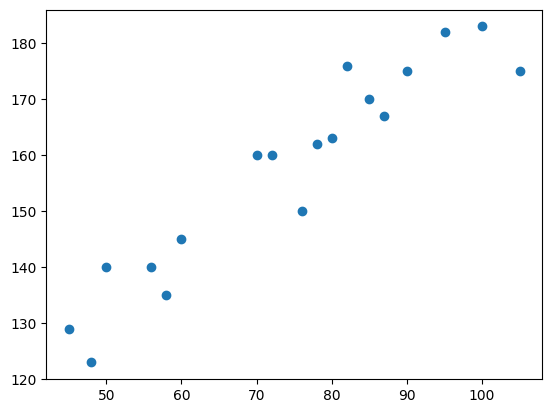

In [90]:
plt.scatter(x_train,y_train)

Text(0.5, 1.0, 'Train and Test data')

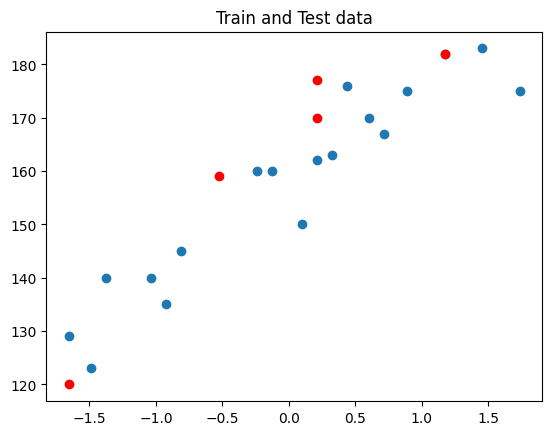

In [91]:
plt.scatter(x_train_scaled,y_train)
plt.scatter(x_test_scaled, y_test,color='r')
plt.title("Train and Test data")

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
regressor = LinearRegression()

In [94]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [95]:
y_pred = regressor.predict(x_test_scaled)

In [96]:
y_train

12    175
1     135
13    183
5     162
2     123
11    182
20    129
3     145
4     160
18    150
16    140
21    140
22    160
7     175
10    176
14    170
19    167
6     163
Name: Height, dtype: int64

C:\Users\1938663\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


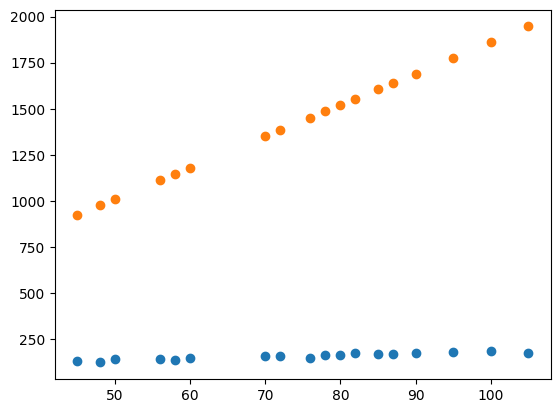

In [97]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,regressor.predict(x_train))
# plt.scatter(x_train,regressor.predict(x_train),color='r')
#this happened because we trained our model on small scaled values and tried to predict the values using original non scaled data.

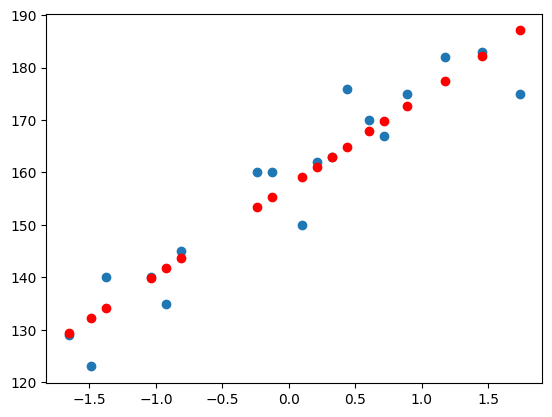

In [98]:
plt.scatter(x_train_scaled, y_train)
plt.scatter(x_train_scaled, regressor.predict(x_train_scaled),color='r')

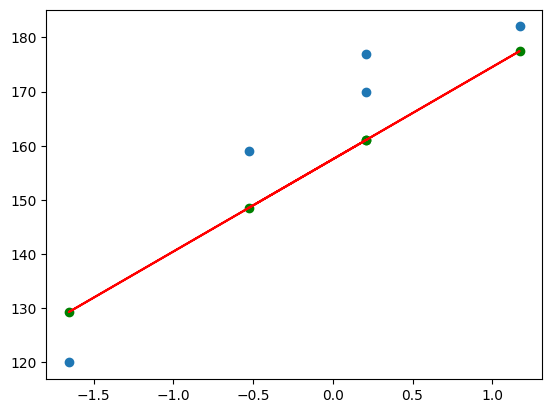

In [99]:
plt.plot(x_test_scaled,y_pred,color='r')
plt.scatter(x_test_scaled,y_pred,color='g')
plt.scatter(x_test_scaled,y_test)
# plt.scatter(y_test,y_pred)

In [100]:
regressor.coef_

array([17.03440872])

In [101]:
regressor.intercept_

np.float64(157.5)

In [102]:
#performance metrics   MSE,MAE,RMSE, R2 and adjusted R2 for model accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [103]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MAE : ', mae, '\nMSE : ', mse, '\nRMSE: ', rmse)

MAE :  9.822657814519232 
MSE :  109.77592599051664 
RMSE:  10.477400726827081


In [104]:
r2 = r2_score(y_test, y_pred)
r2

0.776986986042344

In [105]:
r2*100

77.6986986042344

In [106]:
adjusted_r2 = 1-((1-r2)*(len(y_test)-1)/(len(y_test)-1*x_test.shape[1]-1))
adjusted_r2

0.7026493147231252

In [108]:
#new data weight is 80
scaler.transform([[80]])
regressor.predict(scaler.transform([[80]]))

C:\Users\1938663\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\1938663\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.01076266])

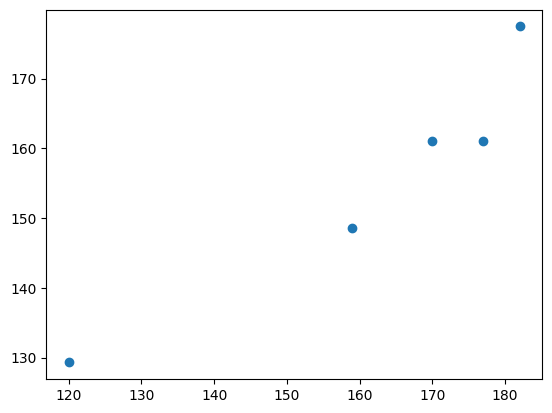

In [110]:
#when do we say model is performing well
# assumptions
plt.scatter(y_test, y_pred)
#if this looks linear then we can say it is good


C:\Users\1938663\AppData\Local\Temp\ipykernel_16544\2615156553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


<Axes: xlabel='Height', ylabel='Density'>

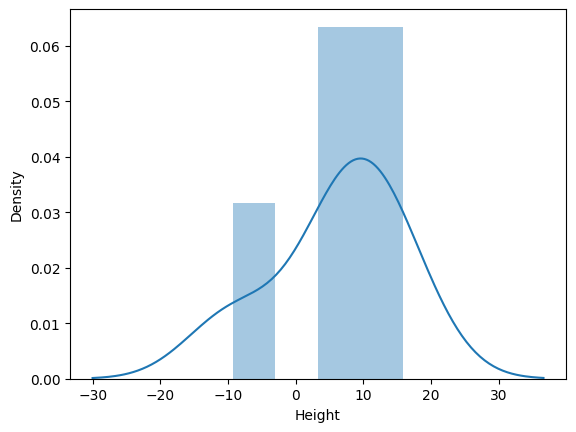

In [113]:
residuals = y_test - y_pred
sns.distplot(residuals,kde = True)
#if we get kind of normal distribution we can say it is good model

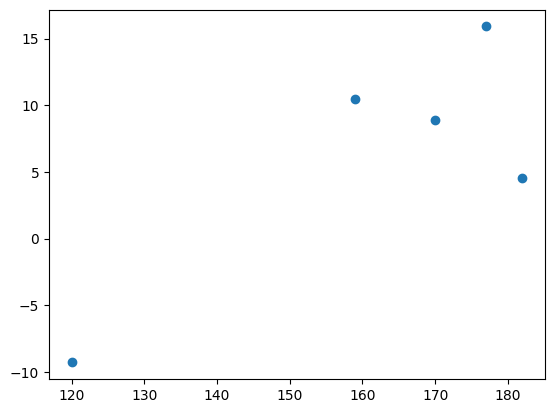

In [117]:
plt.scatter(y_test,residuals)
#this must be uniformaly distributed